In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import seaborn as sns
import matplotlib.pyplot as plt

/kaggle/input/data-mobil/used_car_data.csv


In [2]:
data = pd.read_csv('/kaggle/input/data-mobil/used_car_data.csv')

In [3]:
data.head(1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75


# Merek Mobil yang Tersedia dan Jumlahnya

In [4]:
data.Name.unique()

array(['Maruti Wagon R LXI CNG', 'Hyundai Creta 1.6 CRDi SX Option',
       'Honda Jazz V', ..., 'Volkswagen Polo IPL II 1.2 Petrol Highline',
       'Tata Bolt Revotron XT', 'Mahindra Xylo D4 BSIV'], dtype=object)

In [5]:
d={'Nama':data.Name.unique(),'Jumlah':data['Name'].value_counts()}
no1 = pd.DataFrame(d)
no1

,Nama,Jumlah
Mahindra XUV500 W8 2WD,Maruti Wagon R LXI CNG,49
Maruti Swift VDI,Hyundai Creta 1.6 CRDi SX Option,45
Maruti Swift Dzire VDI,Honda Jazz V,34
Honda City 1.5 S MT,Maruti Ertiga VDI,34
Maruti Swift VDI BSIV,Audi A4 New 2.0 TDI Multitronic,31
...,...,...
Mahindra XUV500 AT W8 FWD,Hyundai Elantra SX,1
Nissan X-Trail SLX AT,Maruti Wagon R Duo Lxi,1
Volvo XC60 D4 SUMMUM,Volkswagen Polo IPL II 1.2 Petrol Highline,1
Datsun redi-GO T,Tata Bolt Revotron XT,1


In [6]:
no1.to_csv('no1.csv', index=False)

# Jumlah Mobil Bekas dan Baru yang ada di setiap Kota

In [7]:
def bekas(b):
    if b=="First":
        return "baru"
    else:
        return "bekas"
data['mobil_grup'] = data['Owner_Type'].apply(bekas)

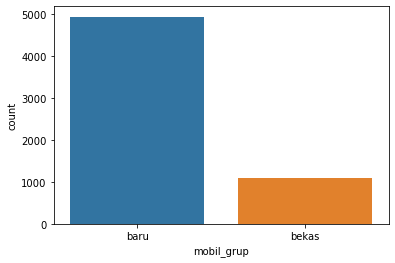

In [8]:
sns.countplot(data.mobil_grup)

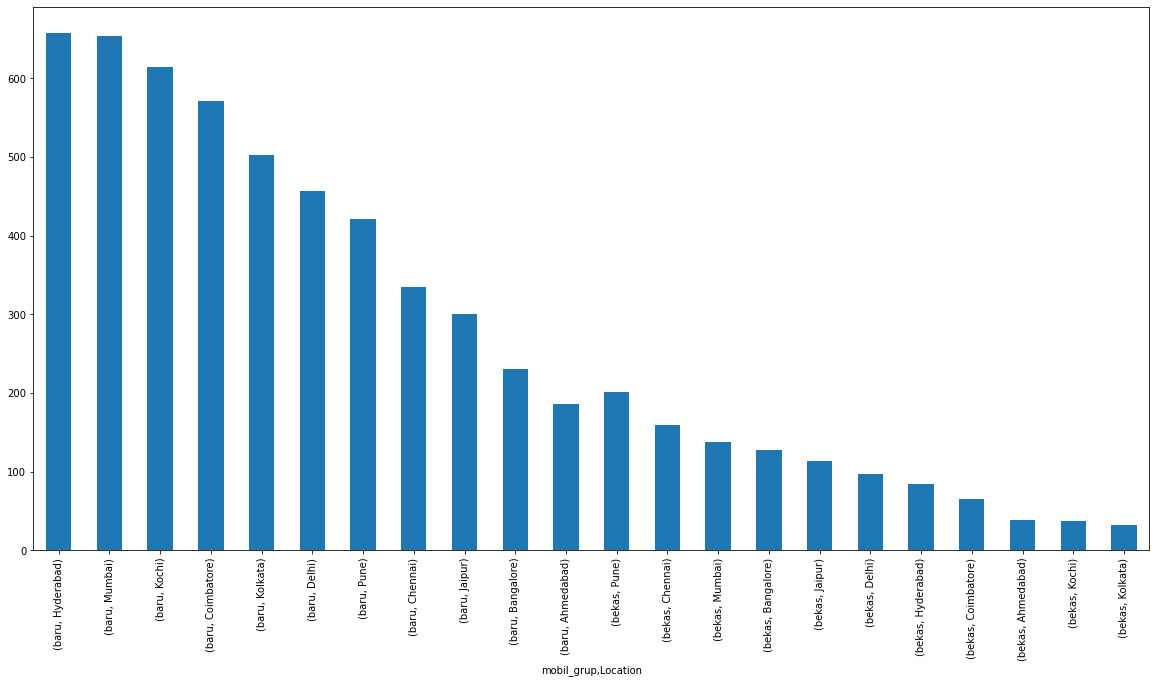

In [9]:
plt.figure(figsize=(20,10))
data.groupby("mobil_grup")['Location'].value_counts().plot(kind='bar')

# Distribusi Tahun Edisi Mobil Bekas dan Baru

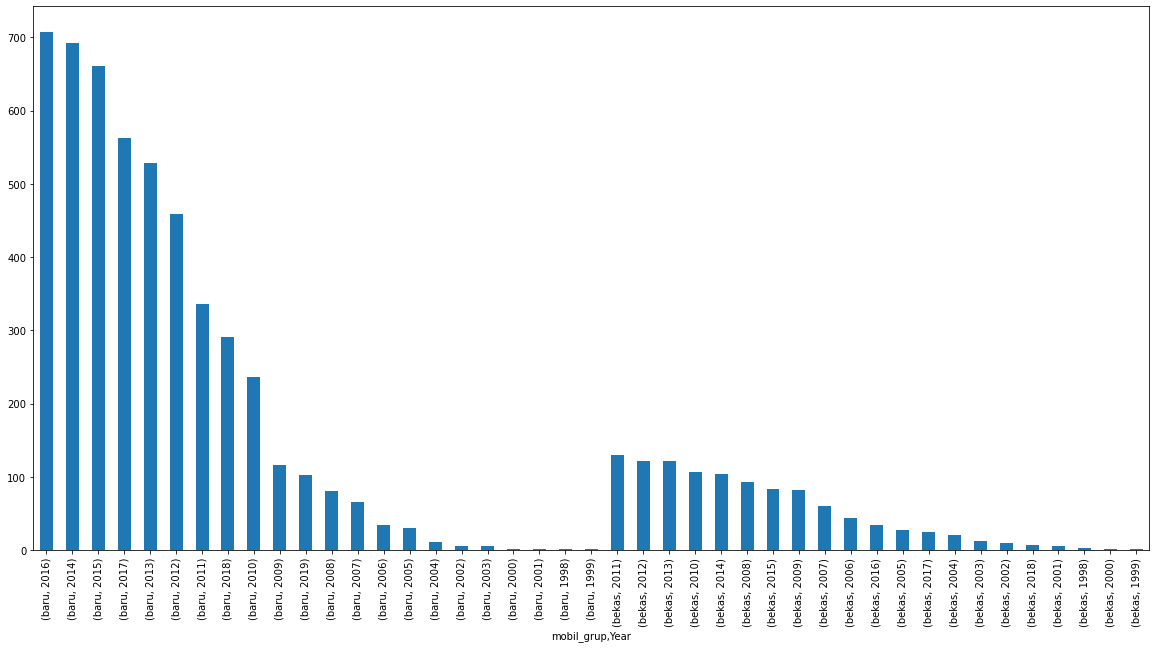

In [10]:
plt.figure(figsize=(20,10))
data.groupby("mobil_grup")['Year'].value_counts().plot(kind='bar')

# Banyak Mobil yang Memiliki Total Jarak Pemakaian di Bawah 100.000 

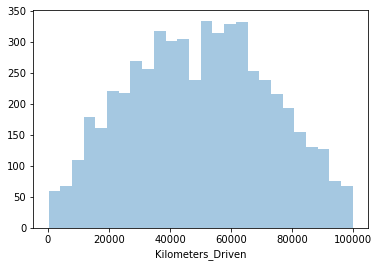

In [11]:
sns.distplot(data[data.Kilometers_Driven<100000].Kilometers_Driven, kde=False)

In [12]:
print("Jumlah:",(data.Kilometers_Driven<100000).sum())

Jumlah: 5470


# Kategori Batas Kilometer Total Jarak Pemakaian

In [13]:
def jarak(s):
    if s<10000:
        return "low"
    else:
        return "high"
data['Kilometers_Driven_group'] = data['Kilometers_Driven'].apply(jarak)

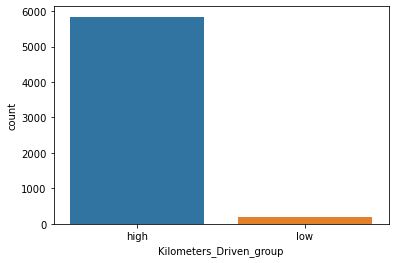

In [14]:
sns.countplot(data.Kilometers_Driven_group)

# Outlier pada kolom Kilometers Driven

{'whiskers': [<matplotlib.lines.Line2D at 0x7f26153b9dd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f26153be890>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f26153b9850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f26153c6390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f26153c68d0>],
 'means': []}

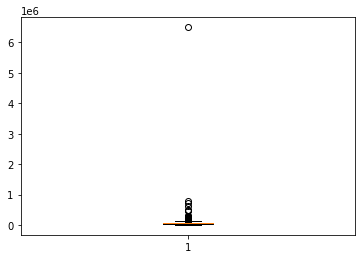

In [15]:
plt.boxplot(data.Kilometers_Driven)

# Pengaruh Tahun Pembuatan Mobil Terhadap Total Jarak Pemakaian

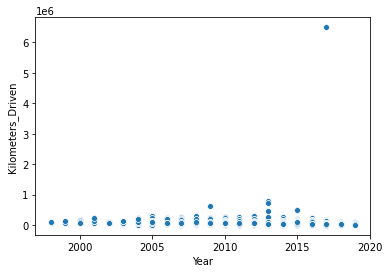

In [16]:
sns.scatterplot(x='Year', y='Kilometers_Driven', data=data)

# Banyak Mobil Yang Merupakan Kepemilikan Ketiga Atau Lebih

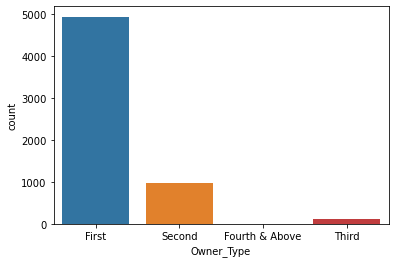

In [17]:
sns.countplot(data.Owner_Type)

In [18]:
print("Jumlah Kendaran Kepemilikan Ketiga:",(data.Owner_Type=='Third').sum())
print("Jumlah Kendaran Kepemilikan Keempat atau lebih:",(data.Owner_Type=='Fourth & Above').sum())
print("Jumlah Kendaran Kepemilikan Keempat atau lebih: ", (data.Owner_Type=='Fourth & Above').sum()+(data.Owner_Type=='Third').sum())

Jumlah Kendaran Kepemilikan Ketiga: 113
Jumlah Kendaran Kepemilikan Keempat atau lebih: 9
Jumlah Kendaran Kepemilikan Keempat atau lebih:  122


# Tipe Bahan Bakar Sesuai Mileage (Konsumsi Bahan Bakar)

In [19]:
data.Mileage.unique()

array(['26.6 km/kg', '19.67 kmpl', '18.2 kmpl', '20.77 kmpl', '15.2 kmpl',
       '21.1 km/kg', '23.08 kmpl', '11.36 kmpl', '20.54 kmpl',
       '22.3 kmpl', '21.56 kmpl', '16.8 kmpl', '25.2 kmpl', '12.7 kmpl',
       '0.0 kmpl', '13.5 kmpl', '25.8 kmpl', '28.4 kmpl', '20.45 kmpl',
       '14.84 kmpl', '22.69 kmpl', '23.65 kmpl', '13.53 kmpl',
       '18.5 kmpl', '14.4 kmpl', '20.92 kmpl', '17.5 kmpl', '12.8 kmpl',
       '19.01 kmpl', '14.53 kmpl', '11.18 kmpl', '12.4 kmpl',
       '16.09 kmpl', '14.0 kmpl', '24.3 kmpl', '18.15 kmpl', '11.74 kmpl',
       '22.07 kmpl', '19.7 kmpl', '25.4 kmpl', '25.32 kmpl', '14.62 kmpl',
       '14.28 kmpl', '14.9 kmpl', '11.25 kmpl', '24.4 kmpl', '16.55 kmpl',
       '17.11 kmpl', '22.9 kmpl', '17.8 kmpl', '18.9 kmpl', '15.04 kmpl',
       '25.17 kmpl', '20.36 kmpl', '13.29 kmpl', '13.68 kmpl',
       '20.0 kmpl', '15.8 kmpl', '25.0 kmpl', '16.4 kmpl', '24.52 kmpl',
       '22.1 kmpl', '8.5 kmpl', '15.1 kmpl', '16.95 kmpl', '19.64 kmpl',
       '16.

In [20]:
data.Mileage.isnull().sum()

2

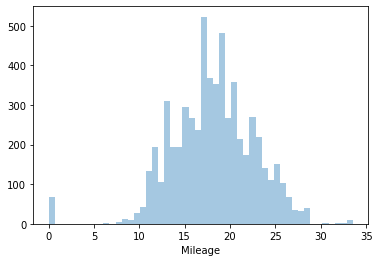

In [21]:
data.Mileage = data.Mileage.apply(lambda s: np.nan if "null" in str(s) else s).str.split(expand=True)[0].astype("float64")
sns.distplot(data.Mileage, kde=False)

# ANALISI LAINNYA

# 1. Harga Mobil

In [22]:
data.Price.unique()

array([ 1.75, 12.5 ,  4.5 , ...,  2.27, 17.56,  7.43])

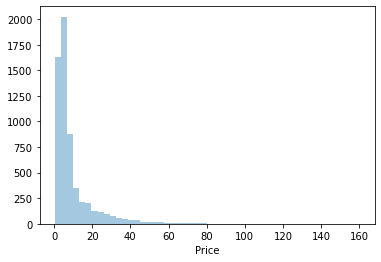

In [23]:
sns.distplot(data['Price'], kde=False)

# 2. JUMLAH MOBIL TIAP TAHUNNYA

In [24]:
data.Year.unique()

array([2010, 2015, 2011, 2012, 2013, 2016, 2018, 2014, 2017, 2007, 2009,
       2008, 2019, 2006, 2005, 2004, 2002, 2000, 2003, 1999, 2001, 1998])

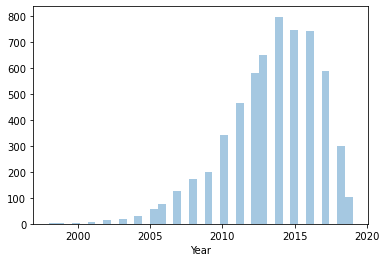

In [25]:
sns.distplot(data['Year'], kde=False)

# 3. Jumlah Mobil Berdasarkan Jumlah Kursi

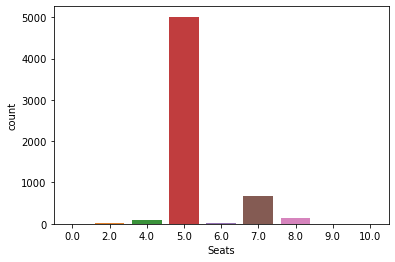

In [26]:
sns.countplot(data.Seats)

# 4. Type Enginee

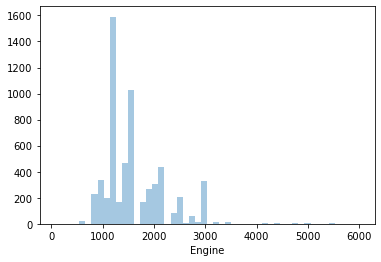

In [27]:
data.Engine = data.Engine.apply(lambda s: np.nan if "null" in str(s) else s).str.split(expand=True)[0].astype("float64")
sns.distplot(data.Engine, kde=False)

# 5. Type Power

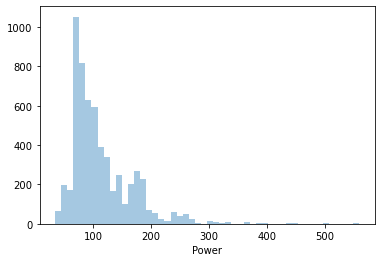

In [28]:
data.Power = data.Power.apply(lambda s: np.nan if "null" in str(s) else s).str.split(expand=True)[0].astype("float64")
sns.distplot(data.Power, kde=False)

# 6. Type Transmision

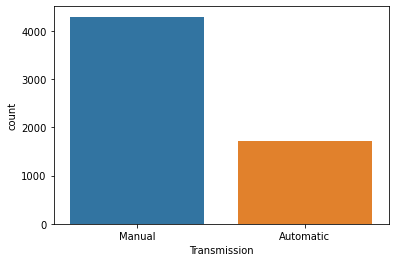

In [29]:
sns.countplot(data.Transmission)

# 7. Type Fuel

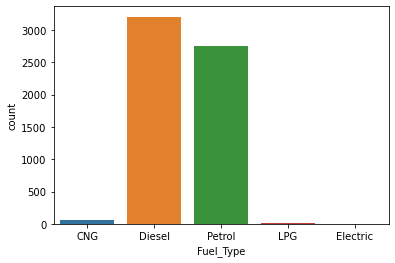

In [30]:
sns.countplot(data.Fuel_Type)

# 8. Jumlah Mobil Perlokasi

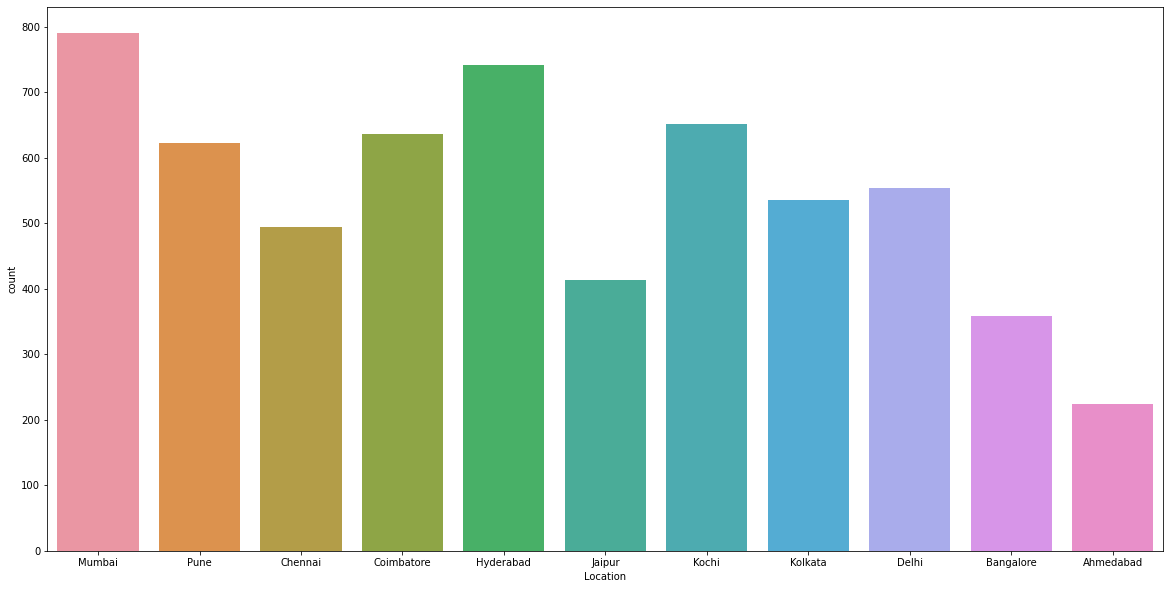

In [31]:
plt.figure(figsize=(20,10))
sns.countplot(data.Location)

# Faktor-faktor yang Mempengaruhi Harga Mobil Bekas

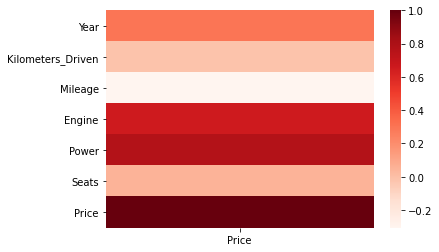

In [32]:
sns.heatmap(data.corr()[['Price']], cmap='Reds')